In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

1: Data Preprocessing

In [ ]:


# Load the dataset
file_path = '/content/AirQualityUCI.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='AirQualityUCI')

# Step 1: Identify missing values and placeholders (-200)
print("Missing Values Summary (before cleaning):")
print(df.isnull().sum())

# Count occurrences of placeholder value -200
invalid_values_summary = (df == -200).sum()
print("\nInvalid (-200) Values Summary:")
print(invalid_values_summary)

# Step 2: Replace -200 with NaN for proper handling
df_cleaned = df.replace(-200, np.nan)

# Step 3: Check for missing values after replacement
print("\nMissing Values Summary (after replacing -200 with NaN):")
print(df_cleaned.isnull().sum())

# Step 4: Handle missing values
# Drop columns with a high proportion of missing data (e.g., > 50%)
missing_proportion = df_cleaned.isnull().mean()
columns_to_drop = missing_proportion[missing_proportion > 0.5].index
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Impute remaining missing values with the median of each column
# Exclude the 'Time' and 'Date' columns from median imputation
numeric_columns = df_cleaned.select_dtypes(include=np.number).columns
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].median())


# Step 5: Select relevant features (e.g., pollutants and sensor readings)
# Updated to only include columns present in df_cleaned after dropping columns
relevant_features = [col for col in [
    "CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)",
    "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"
] if col in df_cleaned.columns]

df_cleaned = df_cleaned[relevant_features]

# Step 6: Save the cleaned dataset to a new file
output_path = 'Cleaned_AirQualityUCI.csv'
df_cleaned.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to {output_path}.")


Missing Values Summary (before cleaning):
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Invalid (-200) Values Summary:
Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Missing Values Summary (after replacing -200 with NaN):
Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(

2: K-Means Clustering

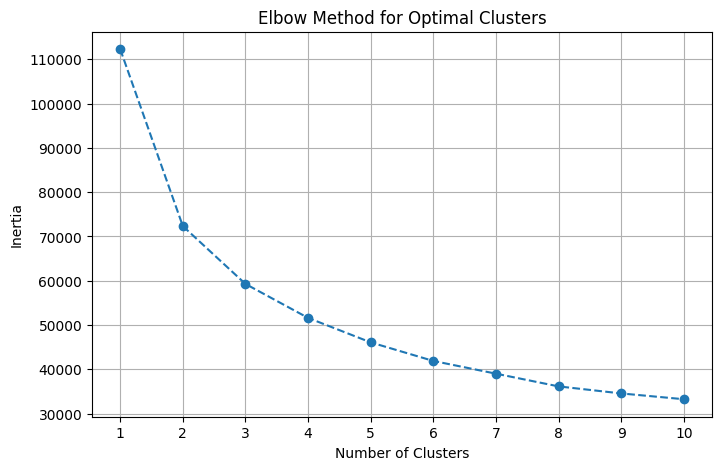

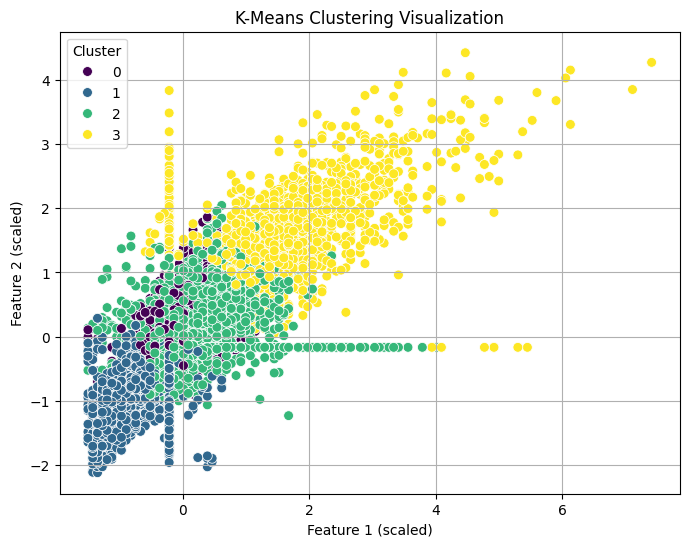

In [ ]:

# Step 1: Load the cleaned dataset
file_path = 'Cleaned_AirQualityUCI.csv'  # Replace with the path to your cleaned data file
df_cleaned = pd.read_csv(file_path)

# Step 2: Standardize the data for better clustering performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cleaned)

# Step 3: Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)  # Test for 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()
plt.show()

# Step 4: Apply K-Means with the optimal number of clusters (e.g., k=4, determined from the elbow plot)
optimal_clusters = 4  # Replace with your chosen value based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(data_scaled)

# Step 5: Visualise the clusters
# Example: Scatter plot using the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data_scaled[:, 0], y=data_scaled[:, 1],
    hue=df_cleaned['Cluster'], palette='viridis', s=50
)
plt.title('K-Means Clustering Visualization')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend(title='Cluster')
plt.grid()
plt.show()




3: Hierarchical Clustering

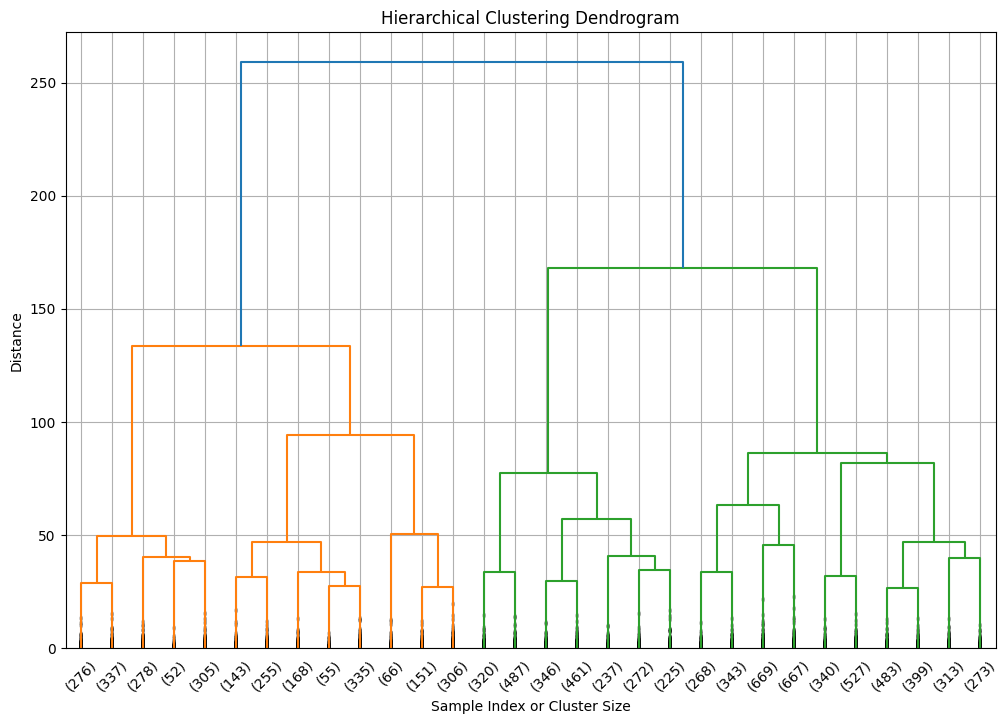

In [ ]:
# Step 1: Perform hierarchical clustering
# Linkage method can be 'ward', 'complete', 'average', or 'single'
linkage_matrix = linkage(data_scaled, method='ward')

# Step 2: Visualize the Dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.grid()
plt.show()


4: Principal Component Analysis (PCA)

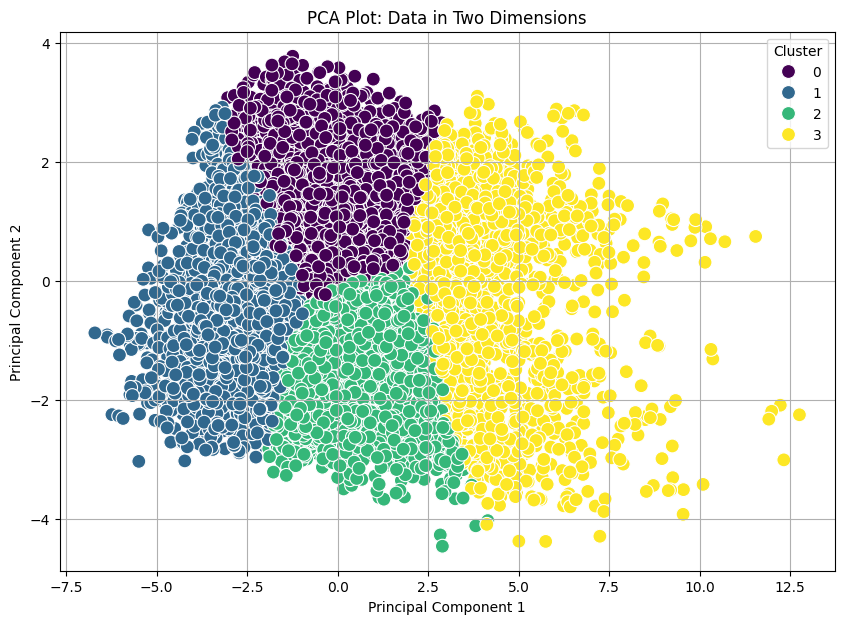

Explained Variance by each Principal Component:
Principal Component 1: 0.55
Principal Component 2: 0.20
Total Variance Explained: 0.76


In [ ]:
# Step 1: Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
df_cleaned['PC1'] = data_pca[:, 0]
df_cleaned['PC2'] = data_pca[:, 1]

# Step 2: Visualize the transformed data in a 2D plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', y='PC2', data=df_cleaned,
    hue='Cluster', palette='viridis', s=100
)
plt.title('PCA Plot: Data in Two Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Step 3: Interpret the results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance by each Principal Component:")
print(f"Principal Component 1: {explained_variance[0]:.2f}")
print(f"Principal Component 2: {explained_variance[1]:.2f}")
print(f"Total Variance Explained: {cumulative_variance[-1]:.2f}")

# Interpretation:
# The first principal component explains the most variance, capturing the primary structure of the data.
# The second principal component captures the next most significant part of the variance.
# Together, they provide a good representation of the data's main features.

# If 'Cluster' is not already in df_cleaned, perform clustering
if 'Cluster' not in df_cleaned.columns:
    clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
    df_cleaned['Cluster'] = clustering.fit_predict(data_scaled)

5: Anomaly Detection

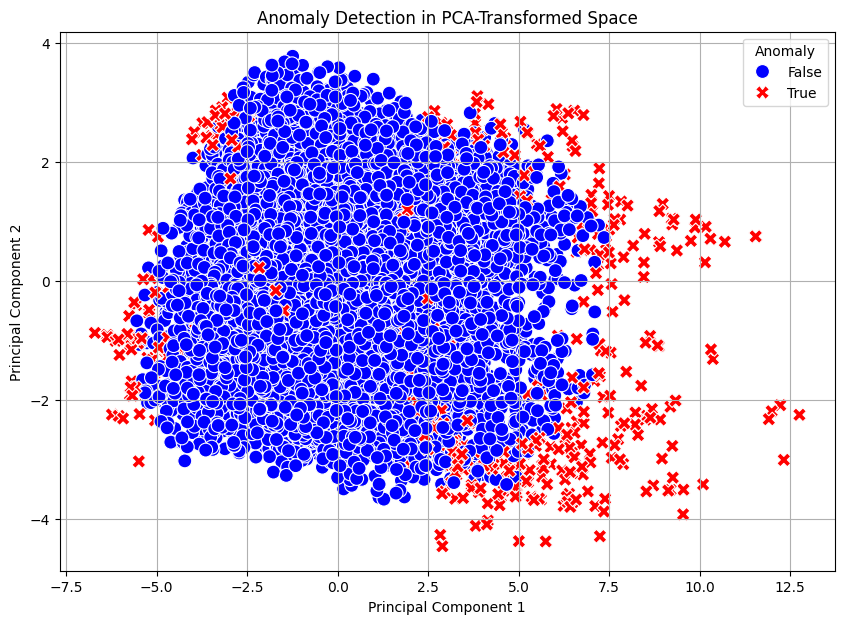

PCA anomaly detection plot saved to pca_anomaly_detection_plot.png.
Results with anomaly flag saved to Anomaly_Detection_AirQuality.csv.


In [ ]:
# Step 1: Calculate distances of data points from their cluster centroids
distances = kmeans.transform(data_scaled)  # Reuse the existing kmeans model
df_cleaned['Distance_to_Centroid'] = distances.min(axis=1)

# Step 2: Identify anomalies
# Define outliers as points beyond the 95th percentile of distances
threshold = np.percentile(df_cleaned['Distance_to_Centroid'], 95)
df_cleaned['Anomaly'] = df_cleaned['Distance_to_Centroid'] > threshold

# Step 3: Visualize the anomalies on the PCA-transformed plot
# Reuse existing PCA-transformed data
df_cleaned['PC1'] = data_pca[:, 0]
df_cleaned['PC2'] = data_pca[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', y='PC2', data=df_cleaned,
    hue='Anomaly', palette={False: 'blue', True: 'red'},
    style='Anomaly', markers={False: 'o', True: 'X'}, s=100
)
plt.title('Anomaly Detection in PCA-Transformed Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Anomaly')
plt.grid()

# Save the visualization
pca_anomaly_plot_path = 'pca_anomaly_detection_plot.png'
plt.savefig(pca_anomaly_plot_path)
plt.show()
print(f"PCA anomaly detection plot saved to {pca_anomaly_plot_path}.")

# Step 4: Save results with anomaly flag
output_path_anomalies = 'Anomaly_Detection_AirQuality.csv'
df_cleaned.to_csv(output_path_anomalies, index=False)
print(f"Results with anomaly flag saved to {output_path_anomalies}.")


### Analysis of Anomalies in Air Quality Monitoring

The detected anomalies (red 'X') in the PCA-transformed space may indicate:

1. **Sensor Errors**: Faulty sensors or calibration issues can cause abnormal readings.  
2. **Localized Pollution Events**: Industrial emissions or traffic spikes may lead to sudden pollutant increases.  
3. **Weather Impact**: Extreme conditions like temperature or humidity changes affect pollutant levels.  
4. **Geographical Outliers**: Stations near pollution hotspots might show unusual patterns.  
5. **Data Issues**: Logging errors or transmission delays can create anomalies.  

These anomalies highlight potential technical faults or real environmental changes, requiring further investigation for accurate air quality monitoring.


Time-Series Anomaly Plot


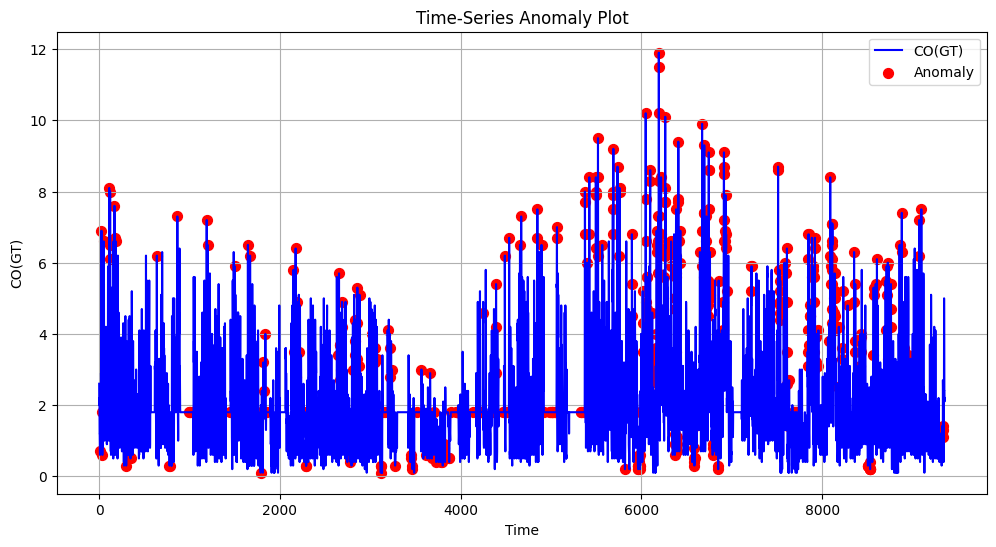

In [ ]:


# Load the updated DataFrame with 'Anomaly' column
df_cleaned = pd.read_csv('Anomaly_Detection_AirQuality.csv') # Load the saved dataframe

# Assuming 'df_cleaned' is the cleaned DataFrame with 'Anomaly' and 'CO(GT)'
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, df_cleaned['CO(GT)'], label='CO(GT)', color='blue')
plt.scatter(df_cleaned.index[df_cleaned['Anomaly'] == 1],
            df_cleaned['CO(GT)'][df_cleaned['Anomaly'] == 1],
            color='red', label='Anomaly', s=50)
plt.title('Time-Series Anomaly Plot')
plt.xlabel('Time')
plt.ylabel('CO(GT)')
plt.legend()
plt.grid()
plt.savefig('anomaly_timeseries.png')
plt.show()

Feature Correlation Heatmap

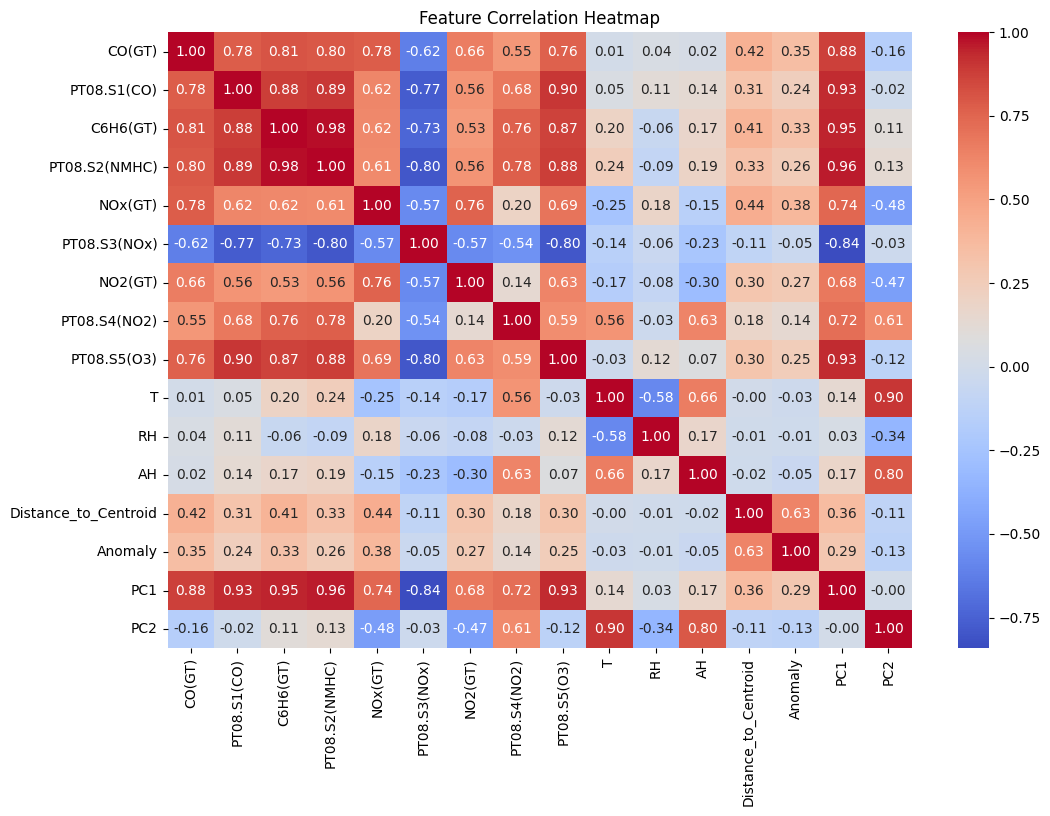

In [ ]:

# Calculate correlations
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()
